<a href="https://colab.research.google.com/github/Zabiullahkhan/Data_Science/blob/main/Web_Scraping_Cheat_Sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Web Scraping Cheat Sheet

Web Scraping is the process of extracting data from a
website. Before studying Beautiful Soup and Selenium, it's
good to review some HTML basics first.

### HTML for Web Scraping

Let's take a look at the HTML element syntax.

In [11]:
from google.colab import files
from IPython.display import Image


In [13]:
uploaded = files.upload() #Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.

Saving Web_HTML.PNG to Web_HTML (2).PNG


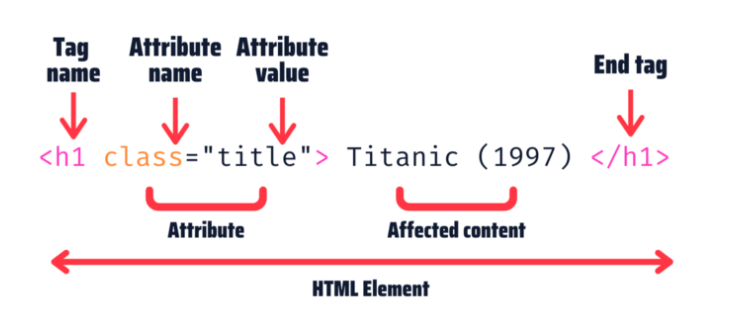

In [15]:
Image('Web_HTML.PNG')

This is a single HTML element, but the HTML code behind a
website has hundreds of them.

HTML code example

In [ ]:
<article class="main-article">
<h1> Titanic (1997) </h1>
<p class="plot"> 84 years later ... </p>
<div class="full-script"> 13 meters. You ... </div>
</article>

The HTML code is structured with “nodes”. Each rectangle below
represents a node (element, attribute and text nodes)

In [16]:
uploaded = files.upload()

Saving Web_HTML2.png to Web_HTML2.png


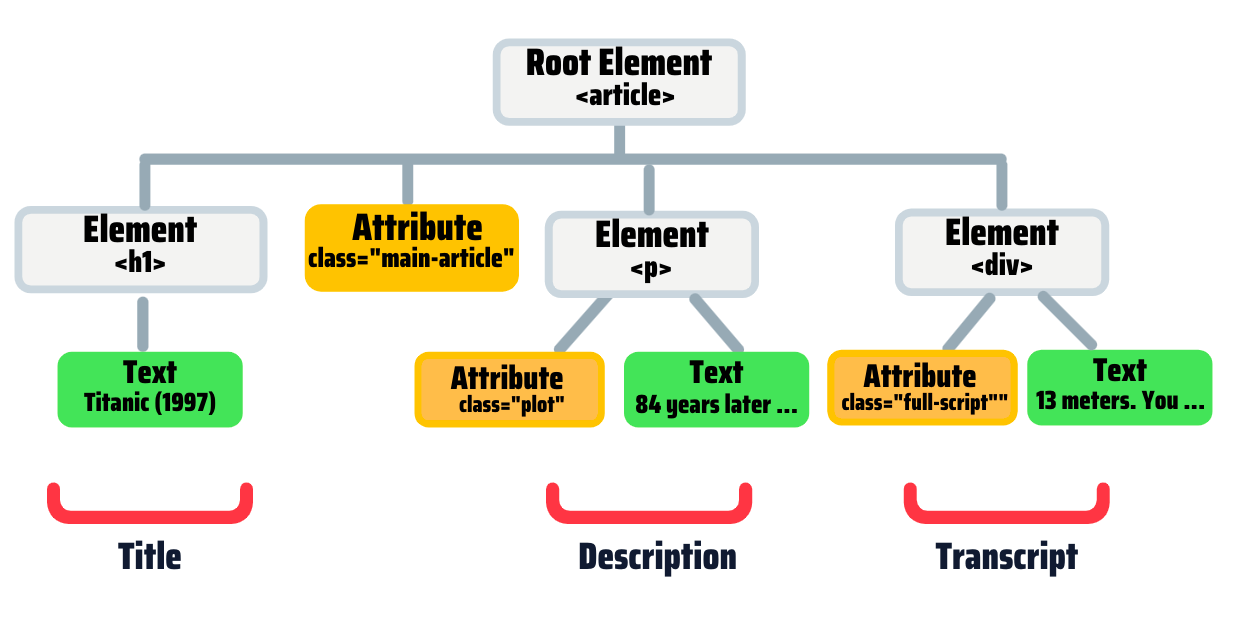

In [17]:
Image('Web_HTML2.png')

- “Siblings” are nodes with the same parent.
- A node’s children and its children’s children are
called its “descendants”. Similarly, a node’s parent
and its parent’s parent are called its “ancestors”.
- it’s recommended to find element in this order.

a. ID

b. Class name

c. Tag name

d. Xpath


### Beautiful Soup

Workflow

Importing the libraries

In [ ]:
from bs4 import BeautifulSoup
import requests

Fetch the pages

In [ ]:
result=requests.get("www.google.com")
result.status_code #get status code
result.headers #get the headers

Page content

In [ ]:
content = result.text

Create soup

In [ ]:
soup = BeautifulSoup(content,"lxml")

HTML in a readable format

In [ ]:
print(soup.prettify())

Find an element

In [ ]:
soup.find_all("a")
soup.find_all("a","css_class")
soup.find_all("a",class_="my_class")
soup.find_all("a",attrs={"class":
"my_class"})

Get inner text

In [ ]:
sample = element.get_text()
sample = element.get_text(strip=True,
separator= ' ')

Get specific attributes

In [ ]:
sample = element.get('href')

### XPath

We need to learn XPath to scrape with Selenium or
Scrapy.

###### XPath Syntax

An XPath usually contains a tag name, attribute
name, and attribute value.

In [ ]:
//tagName[@AttributeName="Value"]

Let’s check some examples to locate the article,
title, and transcript elements of the HTML code we
used before.

In [ ]:
//article[@class="main-article"]
//h1
//div[@class="full-script"]

### XPath Functions and Operators

XPath functions

In [ ]:
//tag[contains(@AttributeName, "Value")]

XPath Operators: and, or

In [ ]:
//tag[(expression 1) and (expression 2)]

XPath Special Characters

- **/**  Selects the children from the node set on the left side of this character

- **//** Specifies that the matching node set should be located at any level within the document

- **.** Specifies the current context should be used (refers to present node)

- **..** Refers to a parent node

- (*) A wildcard character that selects all elements or attributes regardless of names

- **@** Select an attribute

- **()** Grouping an XPath expression

- **[n]** Indicates that a node with index "n" should be selected

# Selenium

### Workflow

In [ ]:
from selenium import webdriver
web = "www.google.com"
path = 'introduce chrome driver path'
driver = webdriver.Chrome(path)
driver.get(web)

Find an element

In [ ]:
driver.find_element_by_id('name')

Find elements

In [ ]:
driver.find_elements_by_class_name()
driver.find_elements_by_css_selector
driver.find_elements_by_xpath()
driver.find_elements_by_tag_name()
driver.find_elements_by_name()

Quit driver

In [ ]:
driver.quit()

Getting the text

In [ ]:
data = element.text

Implicit Waits

In [ ]:
import time
time.sleep(2)

Explicit Waits

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [ ]:
WebDriverWait(driver, 5).until(EC.element_to_be_clickable((By.ID,
'id_name'))) #Wait 5 seconds until an element is clickable

Options: Headless mode, change window size

In [ ]:
from selenium.webdriver.chrome.options import Options
options = Options()
options.headless = True
options.add_argument('window-size=1920x1080')
driver=webdriver.Chrome(path,options=options)

### Scrapy

Scrapy is the most powerful web scraping framework in Python, but it's a bit
complicated to set up, so check my guide or its documentation to set it up.

Creating a Project and Spider

To create a new project, run the following command in the terminal.

In [ ]:
scrapy startproject my_first_spider

To create a new spider, first change the directory.

In [ ]:
cd my_first_spider

Create an spider

In [ ]:
scrapy genspider example example.com

###### The Basic Template 
When you create a spider, you obtain a template with the following content.

In [ ]:
import scrapy
class ExampleSpider(scrapy.Spider):
  name = 'example'
  allowed_domains = ['example.com']   # Class
  start_urls = ['http://example.com/']

def parse(self, response): # Parse Method
  pass

The class is built with the data we introduced in the previous command, but the
parse method needs to be built by us. To build it, use the functions below.

###### Finding elements
To find elements in Scrapy, use the response argument from the parse method

In [ ]:
response.xpath('//tag[@AttributeName="Value"]')

###### Getting the text
To obtain the text element we use text() and either .get() or .getall(). For example:

In [ ]:
response.xpath(‘//h1/text()’).get()
response.xpath(‘//tag[@Attribute=”Value”]/text()’).getall()

###### Return data extracted
To see the data extracted we have to use the yield keyword

In [ ]:
def parse(self, response):
  title = response.xpath(‘//h1/text()’).get()
  # Return data extracted
  yield {'titles': title}

###### Run the spider and export data to CSV or JSON

In [ ]:
scrapy crawl example
scrapy crawl example -o name_of_file.csv
scrapy crawl example -o name_of_file.json